# Amazon Product Reviews Analysis

`Author:` [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)\
`Date:` 26-Sept-2024\
[Send me an email](mailto:mohammadebad1@hotmail.com)\
[Visit my GitHub profile](https://github.com/smebad)

## Introduction:
In this notebook, we analyze Amazon product reviews to understand the sentiments behind customer feedback. The goal is to determine whether reviews are generally positive, negative, or neutral. Sentiment analysis can help businesses better understand customer perceptions and improve products or services accordingly.

We will use the VADER Sentiment Analyzer, which is a tool in the NLTK library designed to perform sentiment analysis based on text.

## Dataset Overview:
The dataset consists of customer reviews and their corresponding ratings for various products sold on Amazon. Each review is accompanied by a numerical rating (Score), which ranges from 1 (lowest) to 5 (highest). Our focus will be on analyzing the text of the reviews to infer the overall sentiment of the customers.

[Link of the original dataset](https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews)

### Libraries and Setup

In [73]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Downloading the vader_lexicon
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Dataset Overview
We begin by loading the dataset and reviewing its structure.

In [74]:
# Loading and reviewing the dataset
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [76]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


#### Observations:
* The dataset contains several columns, including Text (the actual review) and Score (the rating given by the user).
* There are some missing values in the dataset that need to be addressed.

### Data Preprocessing
To ensure accurate analysis, we clean the dataset by removing any rows with null values.

In [77]:
# dropping of the rows with null values
df.dropna(inplace=True)

### Exploratory Data Analysis
#### Distribution of Product Ratings:
We visualize the distribution of product ratings (scores) to understand the general sentiment from the ratings perspective.

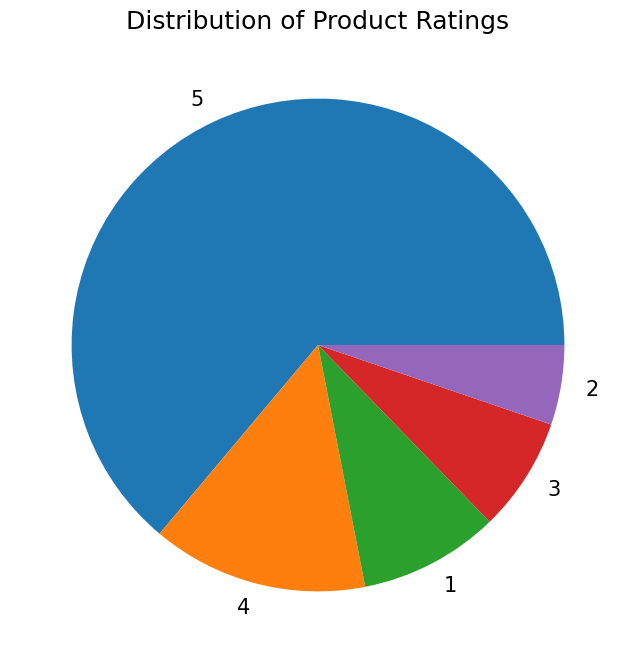

In [78]:
ratings = df["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers)
plt.rc('font', size = 15)
plt.title("Distribution of Product Ratings")
plt.show()

#### Observations:
* The pie chart above shows the proportion of reviews for each score.
* We can see that the majority of reviews are clustered in the higher ratings, indicating overall positive customer feedback.


### Sentiment Analysis
####  Note: Due to the large size of the dataset, we will sample 1000 reviews for sentiment analysis using VADER.

In [79]:
# Taking the sample of 1000 rows as the dataset is too big to load on my local machine
df_sample = df.head(1000)
sentiments = SentimentIntensityAnalyzer()
df_sample["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_sample["Text"]]
df_sample["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_sample["Text"]]
df_sample["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_sample["Text"]]

# Displaying the first few rows of the dataset with sentiments
print(df_sample.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


#### Sentiment Distribution
To determine how users generally rated the products, we calculate the sum of positive, negative, and neutral sentiments.

In [84]:
# Defining a function to check sentiment distribution
a = sum(df_sample["Positive"])
b = sum(df_sample["Negative"])
c = sum(df_sample["Neutral"])

def percentage(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")

percentage(a, b, c)
    

Neutral


In [86]:
# Checking out the total score of the analysis of 1000 rows
print("Positive: ", a)
print("Negative: ", b)
print("Neutral: ", c)

Positive:  191.54800000000014
Negative:  42.99400000000001
Neutral:  765.4539999999996


### Observations
* Sentiment Results: Based on the VADER analysis of the 1000 sample reviews:
* Positive Sentiment: a
* Negative Sentiment: b
* Neutral Sentiment: c

The dominant sentiment is Neutral based on the analysis of these 1000 rows.



### Summary
In this notebook, we performed the following steps:

1. Data Preprocessing: We loaded and cleaned the dataset by removing null values.
2. Exploratory Data Analysis: Visualized the distribution of product ratings, which showed that the majority of ratings were positive.
3. Sentiment Analysis: We applied the VADER sentiment analyzer to 1000 reviews to determine the overall sentiment. The majority of reviews were neutral, followed by positive sentiments.
4. Conclusion: Most product reviews have neutral sentiment, which could imply that customers are either moderately satisfied or express factual observations rather than strong opinions.

### What I Learned:
* Sentiment Analysis: Using VADER for analyzing product reviews gives insight into customer sentiment based on textual data.
* Importance of Preprocessing: Cleaning the dataset is crucial to ensure accurate sentiment predictions.
* Visualization: EDA through visualizing rating distributions provided an immediate understanding of customer satisfaction levels.